In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sqlalchemy import column


In [73]:
# read in the dataset
df = pd.read_csv('data/breast_cancer.csv')

# take a look at the data
df.head(5)


,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [74]:
# check dataset size
df.shape


(569, 4)

In [75]:
# split data into inputs and targets
X = df.drop(columns=['benign'])
y = df['benign']


In [76]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)
X_test


,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant
20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,0.05419,0.8336,1.7360,5.168,100.40,0.004938,0.03089,0.040930,0.016990,0.02816,0.002719,23.23,27.15,152.00,1645.0,0.1097,0.25340,0.30920,0.16130,0.3220,0.06386
11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,0.06758,0.1924,0.6417,1.345,13.04,0.006982,0.03916,0.040170,0.015280,0.02260,0.006822,12.45,17.60,81.25,473.8,0.1073,0.27930,0.26900,0.10560,0.2604,0.09879
13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,0.1588,0.5733,1.102,12.84,0.004450,0.01452,0.013340,0.008791,0.01698,0.002787,14.83,18.32,94.94,660.2,0.1393,0.24990,0.18480,0.13350,0.3227,0.09326
27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623,2.5470,1.3060,18.650,542.20,0.007650,0.05374,0.080550,0.025980,0.01697,0.004558,36.04,31.37,251.20,4254.0,0.1357,0.42560,0.68330,0.26250,0.2641,0.07427
12.72,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,0.06100,0.1807,0.6931,1.340,13.38,0.006064,0.01180,0.006564,0.007978,0.01374,0.001392,13.50,17.48,88.54,553.7,0.1298,0.14720,0.05233,0.06343,0.2369,0.06922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.12650,0.1875,0.06020,0.9761,1.8920,7.128,103.60,0.008439,0.04674,0.059040,0.025360,0.03710,0.004286,24.19,33.81,160.00,1671.0,0.1278,0.34160,0.37030,0.21520,0.3271,0.07632
16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,0.3037,1.2840,2.482,31.59,0.006627,0.04094,0.053710,0.018130,0.01682,0.004584,17.79,28.45,123.50,981.2,0.1415,0.46670,0.58620,0.20350,0.3054,0.09519
13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,0.5648,1.9300,3.909,52.72,0.008824,0.03108,0.031120,0.012910,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.46460,0.20130,0.4432,0.10860
12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.01179,0.011310,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376


In [77]:
type(y_test)

pandas.core.series.Series

In [78]:
# 合并 X_train 和 y_train
X_y_train = X_train.copy()
X_y_train.insert(loc=len(X_y_train.columns), column='benign', value=y_train)
X_y_train

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
14.81,14.70,94.66,680.7,0.08472,0.05016,0.034160,0.025410,0.1659,0.05348,0.2182,0.6232,1.677,20.72,0.006708,0.011970,0.014820,0.010560,0.01580,0.001779,15.61,17.58,101.70,760.2,0.1139,0.10110,0.110100,0.07955,0.2334,0.06142,1
11.71,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.026000,0.1339,0.05945,0.4489,2.5080,3.258,34.37,0.006578,0.013800,0.026620,0.013070,0.01359,0.003707,13.33,25.48,86.16,546.7,0.1271,0.10280,0.104600,0.06968,0.1712,0.07343,1
13.77,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,0.2191,0.6946,1.479,17.74,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.67,16.93,94.17,661.1,0.1170,0.10720,0.037320,0.05802,0.2823,0.06794,1
13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1
19.53,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.106200,0.1792,0.06552,1.1110,1.1610,7.237,133.00,0.006056,0.032030,0.056380,0.017330,0.01884,0.004787,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.612100,0.19800,0.2968,0.09929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.46,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,0.1998,0.6068,1.443,16.07,0.004413,0.014430,0.015090,0.007369,0.01354,0.001787,15.35,25.16,101.90,719.8,0.1624,0.31240,0.265400,0.14270,0.3518,0.08665,1
18.45,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,0.1692,0.05727,0.5959,1.2020,3.766,68.35,0.006001,0.014220,0.028550,0.009148,0.01492,0.002205,22.52,31.39,145.60,1590.0,0.1465,0.22750,0.396500,0.13790,0.3109,0.07610,0
11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418,1
11.71,15.45,75.03,420.3,0.11500,0.07281,0.040060,0.032500,0.2009,0.06506,0.3446,0.7395,2.355,24.53,0.009536,0.010970,0.016510,0.011210,0.01953,0.003100,13.06,18.16,84.16,516.4,0.1460,0.11150,0.108700,0.07864,0.2765,0.07806,1


In [79]:
X_train

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant
14.81,14.70,94.66,680.7,0.08472,0.05016,0.034160,0.025410,0.1659,0.05348,0.2182,0.6232,1.677,20.72,0.006708,0.011970,0.014820,0.010560,0.01580,0.001779,15.61,17.58,101.70,760.2,0.1139,0.10110,0.110100,0.07955,0.2334,0.06142
11.71,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.026000,0.1339,0.05945,0.4489,2.5080,3.258,34.37,0.006578,0.013800,0.026620,0.013070,0.01359,0.003707,13.33,25.48,86.16,546.7,0.1271,0.10280,0.104600,0.06968,0.1712,0.07343
13.77,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,0.2191,0.6946,1.479,17.74,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.67,16.93,94.17,661.1,0.1170,0.10720,0.037320,0.05802,0.2823,0.06794
13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
19.53,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.106200,0.1792,0.06552,1.1110,1.1610,7.237,133.00,0.006056,0.032030,0.056380,0.017330,0.01884,0.004787,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.612100,0.19800,0.2968,0.09929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.46,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,0.1998,0.6068,1.443,16.07,0.004413,0.014430,0.015090,0.007369,0.01354,0.001787,15.35,25.16,101.90,719.8,0.1624,0.31240,0.265400,0.14270,0.3518,0.08665
18.45,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,0.1692,0.05727,0.5959,1.2020,3.766,68.35,0.006001,0.014220,0.028550,0.009148,0.01492,0.002205,22.52,31.39,145.60,1590.0,0.1465,0.22750,0.396500,0.13790,0.3109,0.07610
11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
11.71,15.45,75.03,420.3,0.11500,0.07281,0.040060,0.032500,0.2009,0.06506,0.3446,0.7395,2.355,24.53,0.009536,0.010970,0.016510,0.011210,0.01953,0.003100,13.06,18.16,84.16,516.4,0.1460,0.11150,0.108700,0.07864,0.2765,0.07806


In [80]:
# 使用交叉验证的方式划分训练集
kf = KFold(n_splits=3, shuffle=True, random_state=42)
# for train, test in kf.split(X_y_train):
#     df_base_train = X_y_train.iloc[train]
#     df_base_test = X_y_train.iloc[test]
#     X_base_train = df_base_train.drop(columns=['benign'])
#     y_base_train = df_base_train['benign']
#     X_base_test = df_base_test.drop(columns=['benign'])
#     y_base_test = df_base_test['benign']

# X_base_train


In [81]:
# 计算训练预测样本的香农熵，并插入到新表中
import math


def insert_entropy(predict_train):
    df = pd.DataFrame(predict_train)
    df['entropy'] = df[[0, 1]].apply(lambda x: shannon_entropy(x[0], x[1]), axis=1)
    return df

# 香农熵


def shannon_entropy(p, q):
    if (p <= 0.000001 or q <= 0.000001):
        return 0
    else:
        return -(p * math.log(p) + q * math.log(q))


In [82]:
# knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn_probility_test = np.array([[.0, .0]])
knn_y_test = pd.DataFrame()
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    df_y_base_test = pd.DataFrame(y_base_test)
    knn.fit(X_base_train, y_base_train)
    # knn_probility_train = knn.predict_proba(X_test)
    knn_probility_test = np.concatenate((knn_probility_test, knn.predict_proba(X_base_test)), axis=0)
    knn_y_test = knn_y_test.append(df_y_base_test)

knn_probility_test = np.delete(knn_probility_test, 0, axis = 0)
knn_probility_test


array([[0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4,

In [83]:
type(knn_y_test)

pandas.core.frame.DataFrame

In [84]:
knn_y_test["benign"]

14.810  14.70  94.66   680.7   0.08472  0.05016  0.034160  0.025410  0.1659  0.05348  0.2182  0.6232  1.677  20.720   0.006708  0.011970  0.014820  0.010560  0.01580  0.001779  15.610  17.58  101.70  760.2   0.11390  0.10110  0.110100    1
13.050  19.31  82.61   527.2   0.08060  0.03789  0.000692  0.004167  0.1819  0.05501  0.4040  1.2140  2.595  32.960   0.007491  0.008593  0.000692  0.004167  0.02190  0.002990  14.230  22.25  90.24   624.1   0.10210  0.06191  0.001845    1
17.910  21.02  124.40  994.0   0.12300  0.25760  0.318900  0.119800  0.2113  0.07115  0.4030  0.7747  3.123  41.510   0.007159  0.037180  0.061650  0.010510  0.01591  0.005099  20.800  27.78  149.60  1304.0  0.18730  0.59170  0.903400    0
8.196   16.84  51.71   201.9   0.08600  0.05943  0.015880  0.005917  0.1769  0.06503  0.1563  0.9567  1.094  8.205    0.008968  0.016460  0.015880  0.005917  0.02574  0.002582  8.964   21.96  57.26   242.2   0.12970  0.13570  0.068800    1
14.800  17.66  95.88   674.8   0.09179  

In [85]:
df_knn_probility_test = insert_entropy(knn_probility_test)
df_knn_probility_test.insert(loc=len(df_knn_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_knn_probility_test.to_csv('knn_probility_test.csv')
df_knn_probility_test

,0,1,entropy,benign
0,0.0,1.0,0.000000,1
1,0.0,1.0,0.000000,1
2,1.0,0.0,0.000000,0
3,0.0,1.0,0.000000,1
4,0.0,1.0,0.000000,1
...,...,...,...,...
450,1.0,0.0,0.000000,0
451,0.0,1.0,0.000000,1
452,0.0,1.0,0.000000,1
453,0.4,0.6,0.673012,0


In [86]:
lda = LDA(n_components=1)
lda_probility_test = np.array([[.0, .0]])
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    sc = StandardScaler()
    X_base_train_std = sc.fit_transform(X_base_train)
    X_base_test_std = sc.fit_transform(X_base_test)
    lda.fit_transform(X_base_train_std, y_base_train)
    lda_probility_test = np.concatenate((lda_probility_test, lda.predict_proba(X_base_test)), axis=0)

lda_probility_test = np.delete(lda_probility_test, 0, axis = 0)
lda_probility_test

array([[0.21566583, 0.78433417],
       [0.16647735, 0.83352265],
       [0.32945436, 0.67054564],
       [0.18230763, 0.81769237],
       [0.23336147, 0.76663853],
       [0.25901596, 0.74098404],
       [0.23112194, 0.76887806],
       [0.32760044, 0.67239956],
       [0.21188748, 0.78811252],
       [0.33231787, 0.66768213],
       [0.17247197, 0.82752803],
       [0.29435262, 0.70564738],
       [0.19846047, 0.80153953],
       [0.2219088 , 0.7780912 ],
       [0.20239971, 0.79760029],
       [0.2064508 , 0.7935492 ],
       [0.23424464, 0.76575536],
       [0.45430785, 0.54569215],
       [0.32335448, 0.67664552],
       [0.215652  , 0.784348  ],
       [0.29577001, 0.70422999],
       [0.34433544, 0.65566456],
       [0.31711997, 0.68288003],
       [0.22783444, 0.77216556],
       [0.17506764, 0.82493236],
       [0.21846568, 0.78153432],
       [0.20309235, 0.79690765],
       [0.19959854, 0.80040146],
       [0.2082913 , 0.7917087 ],
       [0.28009599, 0.71990401],
       [0.

In [87]:
df_lda_probility_test = insert_entropy(lda_probility_test)
df_lda_probility_test.insert(loc=len(df_lda_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_lda_probility_test.to_csv('lda_probility_test.csv')
df_lda_probility_test

,0,1,entropy,benign
0,0.215666,0.784334,0.521367,1
1,0.166477,0.833523,0.450256,1
2,0.329454,0.670546,0.633792,0
3,0.182308,0.817692,0.474875,1
4,0.233361,0.766639,0.543306,1
...,...,...,...,...
450,0.388919,0.611081,0.668262,0
451,0.236300,0.763700,0.546777,1
452,0.242080,0.757920,0.553465,1
453,0.352695,0.647305,0.649099,0


In [88]:
gnb=GaussianNB()
gnb_probility_test = np.array([[.0, .0]])
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    gnb.fit(X_base_train, y_base_train)
    gnb_probility_test = np.concatenate((gnb_probility_test, gnb.predict_proba(X_base_test)), axis=0)

gnb_probility_test = np.delete(gnb_probility_test, 0, axis = 0)
gnb_probility_test

array([[5.34962442e-03, 9.94650376e-01],
       [1.76731855e-04, 9.99823268e-01],
       [9.99804849e-01, 1.95151248e-04],
       [9.82978998e-04, 9.99017021e-01],
       [1.16579739e-01, 8.83420261e-01],
       [4.95607966e-01, 5.04392034e-01],
       [2.41668259e-02, 9.75833174e-01],
       [9.94736474e-01, 5.26352609e-03],
       [1.99428224e-02, 9.80057178e-01],
       [9.92661059e-01, 7.33894126e-03],
       [4.70327832e-04, 9.99529672e-01],
       [8.00326331e-01, 1.99673669e-01],
       [3.52488311e-03, 9.96475117e-01],
       [2.31379975e-02, 9.76862003e-01],
       [6.03312731e-03, 9.93966873e-01],
       [2.95304028e-03, 9.97046960e-01],
       [2.95182549e-02, 9.70481745e-01],
       [9.99999996e-01, 4.03888249e-09],
       [9.99991787e-01, 8.21343984e-06],
       [5.95404713e-03, 9.94045953e-01],
       [8.00503469e-01, 1.99496531e-01],
       [9.90813495e-01, 9.18650455e-03],
       [9.99526587e-01, 4.73412905e-04],
       [1.80502041e-02, 9.81949796e-01],
       [3.254783

In [89]:
df_gnb_probility_test = insert_entropy(gnb_probility_test)
df_gnb_probility_test.insert(loc=len(df_gnb_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_gnb_probility_test.to_csv('gnb_probility_test.csv')
df_gnb_probility_test

,0,1,entropy,benign
0,0.005350,0.994650,0.033318,1
1,0.000177,0.999823,0.001704,1
2,0.999805,0.000195,0.001862,0
3,0.000983,0.999017,0.007790,1
4,0.116580,0.883420,0.360055,1
...,...,...,...,...
450,0.933844,0.066156,0.243579,0
451,0.000817,0.999183,0.006624,1
452,0.000974,0.999026,0.007725,1
453,0.380410,0.619590,0.664265,0


In [90]:
# 计算 Loss (三个基分类器kNN、LDA、GN)
import math

def loss(alpha):
    if alpha[0] < 0 or alpha[1] < 0 or alpha[2] < 0 or alpha[0] > math.log(2) or alpha[1] > math.log(2) or alpha[2] > math.log(2):
        return 100.0
    classifier_1 = pd.read_csv("knn_probility_test.csv", sep=',', index_col=0)
    classifier_2 = pd.read_csv("lda_probility_test.csv", sep=',', index_col=0)
    classifier_3 = pd.read_csv("gnb_probility_test.csv", sep=',', index_col=0)
    N = len(classifier_1)
    l = .0
    for i in range(N):
        a = .0
        b = .0
        if (classifier_1.iloc[i][2] < alpha[0]):
            a = a + classifier_1.iloc[i][0]
            b = b + classifier_1.iloc[i][1]
        if (classifier_2.iloc[i][2] < alpha[1]):
            a = a + classifier_2.iloc[i][0]
            b = b + classifier_2.iloc[i][1]
        if (classifier_3.iloc[i][2] < alpha[2]):
            a = a + classifier_3.iloc[i][0]
            b = b + classifier_3.iloc[i][1]
        if a < b:
            y_predict = 1
        else:
            y_predict = 0

        benign = classifier_1.iloc[i][3]
        l += float(benign != y_predict)

    l /= float(N)

    return l


In [91]:
l = loss([math.log(2) , 0, math.log(2)])
l

0.1010989010989011

Iteration 0: Best Cost = 0.0945054945054945
Iteration 1: Best Cost = 0.0945054945054945
Iteration 2: Best Cost = 0.0945054945054945
Iteration 3: Best Cost = 0.09010989010989011
Iteration 4: Best Cost = 0.09010989010989011
Iteration 5: Best Cost = 0.08791208791208792
Iteration 6: Best Cost = 0.08791208791208792
Iteration 7: Best Cost = 0.08791208791208792
Iteration 8: Best Cost = 0.08791208791208792
Iteration 9: Best Cost = 0.08791208791208792
Iteration 10: Best Cost = 0.08791208791208792
Iteration 11: Best Cost = 0.08791208791208792
Iteration 12: Best Cost = 0.08791208791208792
Iteration 13: Best Cost = 0.08791208791208792
Iteration 14: Best Cost = 0.08791208791208792
Iteration 15: Best Cost = 0.08791208791208792
Iteration 16: Best Cost = 0.08791208791208792
Iteration 17: Best Cost = 0.08791208791208792
Iteration 18: Best Cost = 0.08791208791208792
Iteration 19: Best Cost = 0.08791208791208792
Iteration 20: Best Cost = 0.08791208791208792
Iteration 21: Best Cost = 0.08791208791208792
I

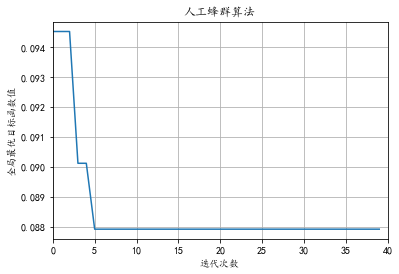

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from ypstruct import structure
import time
import math
import artificial_bee_colony

start = time.time()         #运行开始时刻

# 问题定义
problem = structure()
problem.costfunc = loss
problem.nvar = 3
problem.varmin = .0 * np.ones(3)
problem.varmax = math.log(2) * np.ones(3)

# ABC参数
params = structure()
params.maxit = 40
params.npop = 50
params.nonlooker = 100
params.a = 1

# 运行ABC
out = artificial_bee_colony.run(problem, params)
# 运行结果
plt.rcParams['font.sans-serif'] = ['KaiTi']  #设置字体为楷体
plt.plot(out.bestcost)
print("最优解：{}".format(out.bestsol))
end = time.time()              # 运行结束时刻
print('运行时间：{}s'.format(end-start))

plt.xlim(0, params.maxit)
plt.xlabel('迭代次数')
plt.ylabel('全局最优目标函数值')
plt.title('人工蜂群算法')
plt.grid(True)
plt.show()

In [93]:
alpha = out['bestsol']['position']

In [94]:
# alpha = [0.67548542, 0.43867688, 0.00332863]

In [95]:
knn_test = knn.predict_proba(X_test)
lda_test = lda.predict_proba(X_test)
gnb_test = gnb.predict_proba(X_test)

df_knn_test = insert_entropy(knn_test)
df_lda_test = insert_entropy(lda_test)
df_gnb_test = insert_entropy(gnb_test)

df_y_predict = pd.DataFrame(data=[], columns=['y_predict'])
df_y_predict['y_test'] = y_test.values



In [96]:
df_y_predict

,y_predict,y_test
0,NaN,0
1,NaN,1
2,NaN,1
3,NaN,0
4,NaN,1
...,...,...
109,NaN,0
110,NaN,0
111,NaN,0
112,NaN,1


In [97]:
df_gnb_test

,0,1,entropy
0,0.859623,1.403772e-01,0.405648
1,0.107398,8.926022e-01,0.341040
2,0.565849,4.341510e-01,0.684450
3,0.999952,4.814764e-05,0.000527
4,0.003428,9.965720e-01,0.022879
...,...,...,...
109,0.998261,1.739053e-03,0.012788
110,0.996326,3.674157e-03,0.024266
111,0.999999,9.137601e-07,0.000000
112,0.002876,9.971236e-01,0.019702


In [98]:


N = len(df_knn_test)
for i in range(N):
    a = .0
    b = .0
    if (df_knn_test.iloc[i]['entropy'] < alpha[0]):
        a = a + df_knn_test.iloc[i][0]
        b = b + df_knn_test.iloc[i][1]
    if (df_lda_test.iloc[i]['entropy'] < alpha[1]):
        a = a + df_lda_test.iloc[i][0]
        b = b + df_lda_test.iloc[i][1]
    if (df_gnb_test.iloc[i]['entropy'] < alpha[2]):
        a = a + df_gnb_test.iloc[i][0]
        b = b + df_gnb_test.iloc[i][1]
    if a < b:
        df_y_predict.at[i, 'y_predict'] = 1
    else:
        df_y_predict.at[i, 'y_predict'] = 0



In [99]:
df_y_predict

,y_predict,y_test
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
109,0,0
110,0,0
111,0,0
112,1,1


In [100]:
count = 0
for i in range(N):
    if df_y_predict.iloc[i][0] == df_y_predict.iloc[i][1]:
        count += 1

float(count) / float(N)

0.9298245614035088

In [101]:
# test the three models with the test data and print their accuracy scores

print('knn: {}'.format(knn.score(X_test, y_test)))
print('lda: {}'.format(lda.score(X_test, y_test)))
print('gnb: {}'.format(gnb.score(X_test, y_test)))


knn: 0.9298245614035088
lda: 0.6491228070175439
gnb: 0.9035087719298246


In [103]:
#create a dictionary of our models
estimators=[('knn', knn), ('lda', lda), ('gnb', gnb)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.9298245614035088